# <b><center>Importing Libraries</b></center>

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold
import warnings
#Importing all the libraries

# <b><center>Movies File (csv)</b></center>

In [41]:
movie_names = pd.read_csv('movies.csv')
movie_names.head(10)
#reading the data set movies.csv
#bringing in the first 10 rows to see if the data has been uploaded

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# <b><center>Ratings File (csv)</b></center>

In [42]:
ratings_data = pd.read_csv('ratings.csv')
ratings_data.head(10)
#reading the data set rating.csv
#bringing in the first 10 rows to see if the data has been uploaded

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


# <b><center>Merging (Movies.csv and Ratings.csv) Files</b></center>

In [43]:
movie_data = pd.merge(ratings_data, movie_names, on ='movieId')
movie_data.head(10)
#To get our desired information in a single dataframe, 
#we can merge the two dataframes objects on the movieId column

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# <b><center>Grouping the Dataset and Calculating the Mean</b></center>

In [44]:
movie_data.groupby('title')['rating'].mean().head(10)
#group the dataset by the title of the movie and then calculate the mean of the rating

title
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
'Tis the Season for Love (2015)            1.500000
'burbs, The (1989)                         3.176471
'night Mother (1986)                       3.000000
(500) Days of Summer (2009)                3.666667
*batteries not included (1987)             3.285714
Name: rating, dtype: float64

In [45]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
#sort the ratings in the descending order of their average ratings

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

# <b><center>Sorting in Descending Order Based On Counts</b></center>

In [46]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
#the above stats can be misleading since a single movie can be at top
#we need to sort based on the number of ratings
#list below supports our point that good movies normally receive higher ratings

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [47]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
# create ratings_mean_count dataframe and first add the average rating of each movie to this dataframe

In [48]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
#Next, we need to add the number of ratings for a movie to the ratings_mean_count dataframe. 

# <b><center>Movie Titles With Average Raitings and Counts</b></center>

In [49]:
ratings_mean_count.head(10)
#movie title, along with the average rating and number of ratings for the movie.

,rating,rating_counts
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [50]:
#sns.set_style("whitegrid") 
#ax = sns.catplot(x="rating", y="title", kind="box", data=movie_data.head(1000))
#plt.title('Rating Range')

# <b><center>Box Plot Graph</b></center>

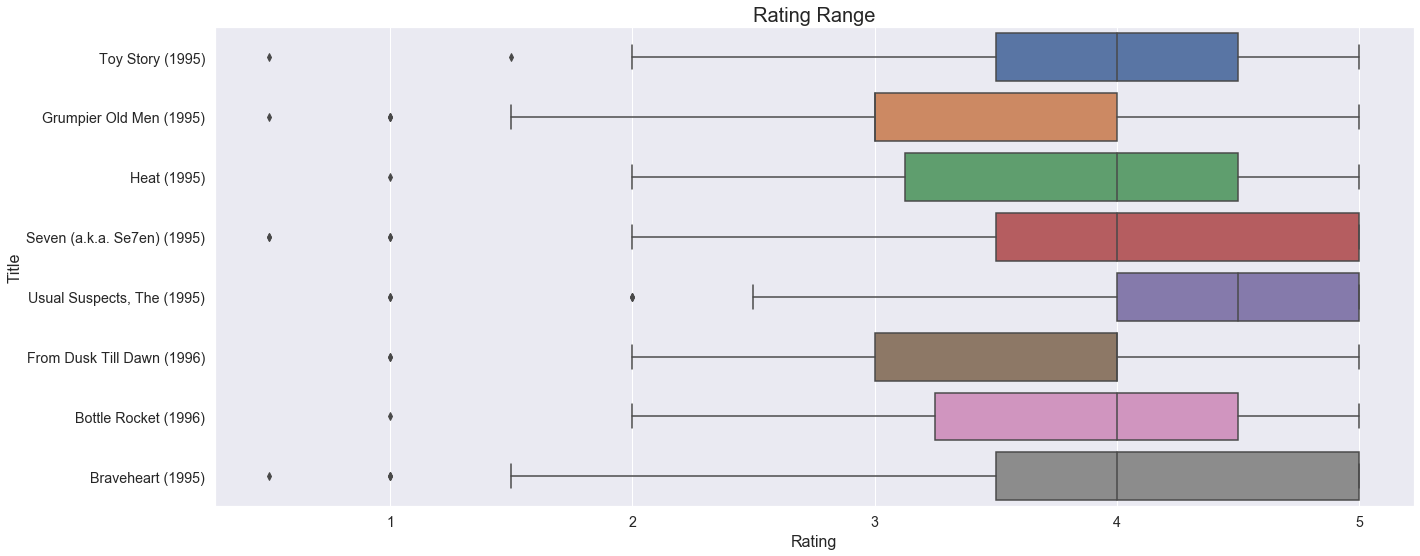

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.set(font_scale = 1.3)
dfplot=movie_data.head(1000)

ax=sns.boxplot(data=dfplot, x='rating', y='title')

ax.set_title('Rating Range',fontsize=20)
ax.set_xlabel('Rating',fontsize=16)
ax.set_ylabel('Title',fontsize=16)
ax2 = ax.axes
lines = ax2.get_lines()
categories = ax2.get_xticks()
ax.figure.tight_layout()
plt.savefig('boxplot.png',dpi=300, bbox_inches='tight')
#box plot graph - ratings on titles

# <b><center>Histogram Graph - Rating Graph</b></center>

Text(0.5, 1.0, 'Rating Counts')

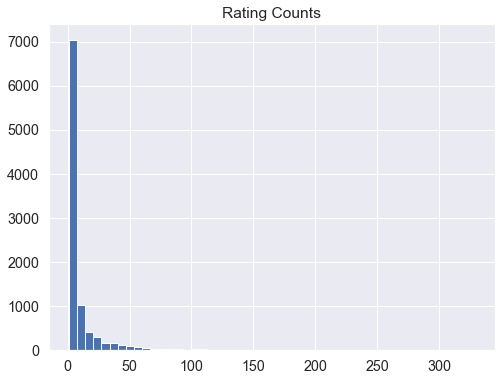

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)
plt.title('Rating Counts')
#plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe

# <b><center>Histogram - Count of Users Per Movie Rating</b></center>

Text(0.5, 1.0, 'Count of Users Per Movie Rating')

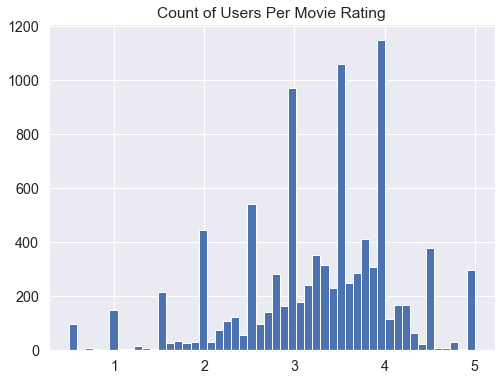

In [53]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)
plt.title('Count of Users Per Movie Rating')
#From the output, you can see that most of the movies have received less than 50 ratings.
#While the number of movies having more than 100 ratings is very low.

# <b><center>Outliers</b></center>

<Figure size 576x432 with 0 Axes>

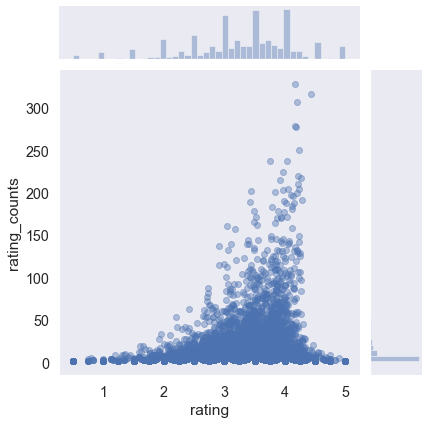

In [54]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)
#You can see that the integer values have taller bars than the floating values since most of the users assign rating as integer
#value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal 
#distribution with the mean of around 3.5. There are a few outliers in the data.
#plot average ratings against the number of ratings:

# <b><center>Matrix of Movie Titles</b></center>

In [55]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head(10)
#create the matrix of movie titles and corresponding user ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [56]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head(10)
#find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it
#We chose this movie since it has the highest number of ratings
#and we want to find the correlation between movies that have a higher number of ratings

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

# <b><center>Finding Correlations</b></center>

In [57]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head(10)
#find the correlation between the user ratings for the "Forest Gump (1994)" 
#and all the other movies using corrwith() function as shown below

C:\Users\Prince P\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Prince P\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.088009
"10,000 BC (2008)",-0.143823


# <b><center>All Movies Related to (Forest Gump)</b></center>

In [58]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)
#retrieved the list of all the movies related to "Forrest Gump (1994)
#we created a dataframe that contains movie title and correlation columns.
#We then removed all the NA values from the dataframe and displayed its first 10 rows using the head function.

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [59]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head(10)
#From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" 
#are not very well known. This shows that correlation alone is not a good metric 
#for similarity because there can be a user who watched '"Forest Gump (1994)" 
#and only one other movie and rated both of them as 5.
#A solution to this problem is to retrieve only those correlated movies that have
#at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe
#to our corr_forrest_gump dataframe. 

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.752057,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.088009,54
"10,000 BC (2008)",-0.143823,17


# <b><center>Our Recommendation</b></center>

In [60]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head(5)
#Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)".
#The movies in the list are some of the most famous movies Hollywood movies, and since "Forest Gump (1994)"
#is also a very famous movie, there is a high chance that these movies are correlated.

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


# <b><center>Test Our Accuracy</b></center>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [62]:
# for Surprise, we only need three columns from the dataset
data = movie_data[['userId', 'movieId', 'rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [63]:
# instantiate SVD and fit the trainset
svd = SVD()
svd.fit(trainset)

In [64]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8806


0.8806473054782996

In [65]:
# taking a look at the first 10 rows of our test set
predictions[:10]

[Prediction(uid=307, iid=916, r_ui=4.0, est=3.2398119290888006, details={'was_impossible': False}),
 Prediction(uid=89, iid=93006, r_ui=4.5, est=3.4933244202278955, details={'was_impossible': False}),
 Prediction(uid=212, iid=2028, r_ui=2.5, est=3.9619904274261, details={'was_impossible': False}),
 Prediction(uid=105, iid=77455, r_ui=5.0, est=4.283656227659008, details={'was_impossible': False}),
 Prediction(uid=232, iid=58839, r_ui=3.0, est=2.8171445972348828, details={'was_impossible': False}),
 Prediction(uid=483, iid=1370, r_ui=4.0, est=3.3358866279749, details={'was_impossible': False}),
 Prediction(uid=489, iid=1320, r_ui=3.5, est=2.7834728887726095, details={'was_impossible': False}),
 Prediction(uid=187, iid=40732, r_ui=3.0, est=3.9737723540835015, details={'was_impossible': False}),
 Prediction(uid=21, iid=103819, r_ui=1.5, est=3.1195876672253844, details={'was_impossible': False}),
 Prediction(uid=387, iid=5113, r_ui=3.0, est=2.90988321120385, details={'was_impossible': False

In [66]:
print("Number of users: ", movie_data.userId.nunique()) 
print("Number of movies: ", movie_data.movieId.nunique())

Number of users:  610
Number of movies:  9724


In [67]:
user = 5
item = 100
svd.predict(user, item)

Prediction(uid=5, iid=100, r_ui=None, est=2.872327586771551, details={'was_impossible': False})

In [ ]:
#In this study, we used a recommendation system using 2 csv files from University of Minnesota.

#There were 610 users and 9,724 types of movies. First, we had to merge the 2 files by joing the movie ID fields together. 

#We then Grouped the dataset and calculated the mean. We wanted to base our recomendation on a movie with the highest rating

#for more accruacy. After getting the count and descending the data, we found Forrest Gump (1994) having the most number of ratings.

#We then decided to find all movies correlated with Forest Gump, but, only those movie titles with average raitings and counts of 50 or more.

#Based on our model, we believe that if you enjoy Forest Gump, you will also enjoy the following movies:

#1.Mr. Holland's Opus
#2.Pocahontas
#3.Grumpier Old Men 
#4.Caddyshack 